In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data

In [52]:
from sqlalchemy import create_engine


driver = 'mysql+pymysql:'
user = 'adria'
password = '00000'
ip = '35.187.114.125'
database = 'vimet'

connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [53]:
items = pd.read_sql('items', con = engine)
orders = pd.read_sql('orders', con = engine)
customer = pd.read_sql('customers', con = engine)

In [54]:
items = items.merge(orders[['Name', 'Customer']], how='left', on='Name').dropna()

In [55]:
customer.head()

,index,Customer,Accepts Marketing,Shipping City,customer_class
0,0,1,1,Barcelona,regular
1,1,2,1,Barcelona,casual
2,2,3,1,Barcelona,preferred
3,3,4,1,Barcelona,casual
4,4,5,1,Barcelona,preferred


In [67]:
items = items.merge(customer[['Customer','customer_class']])

In [69]:
items = items[items['Vendor'] != 'Gran Recapte']
items = items[items['tags'] != 'Cesta']

### Create a data frame that contains the total quantity of each product purchased by each order

In [70]:
rec = items.groupby(['Customer', 'tags']).sum()[['Lineitem quantity']]

### Create a product by order matrix

In [71]:
df_pivot = rec.pivot_table(index='tags', columns='Customer', values='Lineitem quantity').fillna(0)
df_pivot.head()

Customer,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,42.0,43.0,44.0,45.0,46.0,47.0,48.0,50.0,51.0,53.0
tags,,,,,,,,,,,,,,,,,,,,,
Aceite,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acelgas,1.0,3.0,0.0,4.0,0.0,2.0,2.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Agua,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aguacate,0.0,2.0,1.0,8.0,1.0,2.0,2.0,0.0,2.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0
Ajo,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create an order similarity matrix

In [72]:
from scipy.spatial.distance import pdist, squareform
similarity_matrix = squareform(pdist(df_pivot.T, 'cosine'))
similarity_matrix[0]

array([0.        , 0.31814561, 0.48187717, 0.39945868, 0.54732686,
       0.32813553, 0.4660508 , 0.43955586, 0.59060066, 0.325718  ,
       0.52628901, 0.39898463, 0.5848266 , 0.35751906, 0.48438142,
       0.40745858, 0.59657922, 0.59252463, 0.54893978, 0.61558928,
       0.5278517 , 0.51400099, 0.58638005, 0.48364682, 0.49080673,
       0.48312678, 0.54624335, 0.68902264, 0.80450023, 0.64340559,
       0.60415173, 0.67729336, 0.61134422, 0.80647678, 0.77996699,
       0.46723392, 1.        , 0.68266388, 0.96393908, 0.57674797,
       0.84774219, 1.        , 0.96393908, 0.91822152, 0.97450108,
       1.        , 0.73476284, 0.96393908])

In [73]:
similarity_df = pd.DataFrame(similarity_matrix, index=df_pivot.columns, columns=df_pivot.columns)

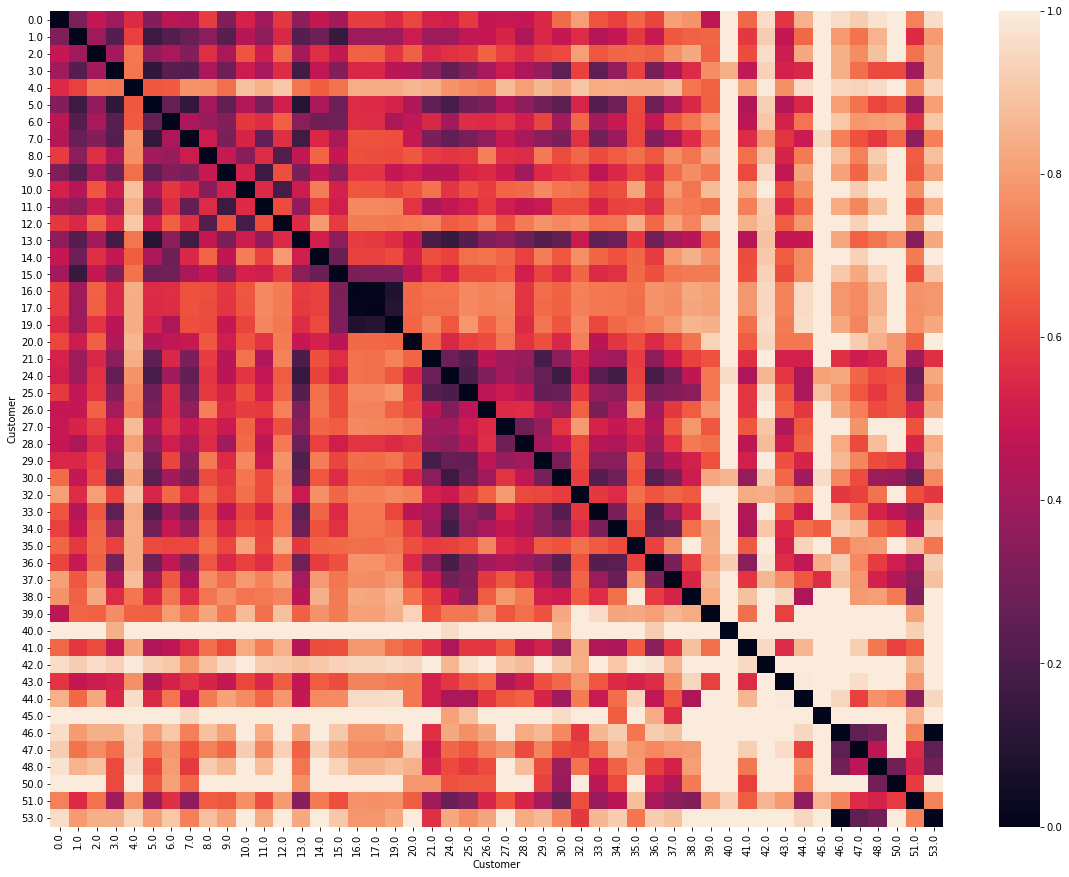

In [74]:
plt.figure(figsize=(20,15))
sns.heatmap(similarity_df)

plt.show()

We see some strong similarities between some clients, let's check that the distance metric is reliable

In [118]:
items[items['Customer']==5]

,index,Name,Lineitem quantity,Lineitem name,Lineitem price,Lineitem fulfillment status,Cancelled at,Refunded Amount,Vendor,Lineitem discount,tags,Customer,customer_class
553,98,#1243,1,Huevos ecológicos (6 unidades),2.60,fulfilled,not cancelled,0.00,El Pagés,0,Huevos,5.0,preferred
554,99,#1243,1,Pechuga de pavo Fileteada - 500 grs.,4.95,fulfilled,not cancelled,0.00,El Pagés,0,Pavo,5.0,preferred
555,100,#1243,1,Alubia cocida Pequeña Santa Pau - 350 grs.,2.10,fulfilled,not cancelled,0.00,Llegums Porta Novau,0,Alubia,5.0,preferred
556,101,#1243,1,Vaca Urgèlia - 150 grs.,2.20,fulfilled,not cancelled,0.00,Xarcuteria Alonso Andrés,0,Vaca,5.0,preferred
557,102,#1243,1,Caballa (4 lomos sin espinas) - 250 grs. aprox.,4.20,fulfilled,not cancelled,0.00,Peixateria La Ribera,0,Caballa,5.0,preferred
558,103,#1243,1,Fresón Maresme - 1 caja (500 grs.),3.50,fulfilled,not cancelled,0.00,Fruites i Verdures Rovira,0,Fresón,5.0,preferred
559,104,#1243,1,Kiwi Green - 4 unidades,2.45,fulfilled,not cancelled,0.00,Fruites i Verdures Rovira,0,Kiwi,5.0,preferred
560,105,#1243,1,Plátano Canarias Verde - 3/4 unidades,1.75,fulfilled,not cancelled,0.00,Fruites i Verdures Rovira,0,Plátano,5.0,preferred
561,106,#1243,1,Berenjena negra - 500 grs.,1.40,fulfilled,not cancelled,0.00,Fruites i Verdures Rovira,0,Berenjena,5.0,preferred
562,107,#1243,1,Cabezas de ajos (3 unidades),1.35,fulfilled,not cancelled,0.00,Fruites i Verdures Rovira,0,Ajo,5.0,preferred


In [117]:
items[items['Customer']==13]

,index,Name,Lineitem quantity,Lineitem name,Lineitem price,Lineitem fulfillment status,Cancelled at,Refunded Amount,Vendor,Lineitem discount,tags,Customer,customer_class
1232,447,#1226,1,Pera Conference - 4 unidades,1.60,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Pera,13.0,preferred
1233,448,#1226,1,Naranja valenciana - 1 kg. aprox. 4 uds.,2.40,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Naranja,13.0,preferred
1234,449,#1226,1,Berenjena negra - 500 grs.,1.40,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Berenjena,13.0,preferred
1235,450,#1226,1,Calabaza cortada y pelada - 1 bandeja (500 grs.),2.00,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Calabaza,13.0,preferred
1236,451,#1226,2,Endivias (1 unidad),0.75,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Endivias,13.0,preferred
1237,452,#1226,1,Tomate Monterosa - 500 grs.,2.10,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Tomate,13.0,preferred
1238,453,#1226,1,Espinacas - Bolsa 300 grs.,2.00,fulfilled,not cancelled,0.0,Fruites i Verdures Rovira,0,Espinacas,13.0,preferred
1239,454,#1226,2,Caballa - 250 grs. aprox.,4.20,fulfilled,not cancelled,0.0,Peixateria La Ribera,0,Caballa,13.0,preferred
1240,455,#1226,1,Berberechos (depurados) - 300 grs.,6.00,fulfilled,not cancelled,0.0,Peixateria La Ribera,0,Berberechos,13.0,preferred
1241,456,#1226,1,Almendra Cruda - 125 grs.,2.00,fulfilled,not cancelled,0.0,Llegums Porta Novau,0,Almendra,13.0,preferred


We need to define some metrics to be able to compare clients:
* Number of orders bought
* Money spent
* Items in common

**Quantity of items**

In [105]:
sum(list(items[items['Customer']==13]['Lineitem quantity']))

320

In [119]:
sum(list(items[items['Customer']==5]['Lineitem quantity']))

305

**Money spent**

In [91]:
sum(list(items[items['Customer']==13]['Lineitem price']))

860.2999999999997

In [120]:
sum(list(items[items['Customer']==5]['Lineitem price']))

801.6399999999994

**Items in common**

In [123]:
#Total items in common
len(set(items[items['Customer']==5]['tags']).intersection(set(items[items['Customer']==13]['tags'])))

69

In [125]:
# percentage of items in common
len(set(items[items['Customer']==5]['tags']).intersection(set(items[items['Customer']==13]['tags'])))/len(set(items[items['Customer']==5]['tags']).union(set(items[items['Customer']==13]['tags'])))*100

66.99029126213593

In [147]:
test = similarity_df[similarity_df < 0.1]

In [159]:
list(test[test[13] >=0][13].index)

[5.0, 13.0]

In [160]:
# We define a function to fully identify similar orders, given an items dataframe a level of similarity and 
# the name of the order

# Required fields in the DF: 'Vendor', 'tags', 'Customer', 'Name' and 'Lineitem quantity'
def user_recomender(df, level, customer_id):
    #Import the needed libraries
    from scipy.spatial.distance import pdist, squareform
    #Drop outliers
    df = df[df['Vendor'] != 'Gran Recapte']
    df = df[df['tags'] != 'Cesta']
    #Build similarity matrix
    rec = df.groupby(['Customer', 'tags']).sum()[['Lineitem quantity']]
    df_pivot = rec.pivot_table(index='tags', columns='Customer', values='Lineitem quantity').fillna(0)
    similarity_matrix = squareform(pdist(df_pivot.T, 'cosine'))
    similarity_df = pd.DataFrame(similarity_matrix, index=df_pivot.columns, columns=df_pivot.columns)    
    #Filter by level of similarity
    result = similarity_df[similarity_df >= ((level-1)/10)]    
    result = result[result < level/10]
    #Return the list or orders without the order provided
    return (list(result[result[customer_id] >= 0][customer_id].index))

In [161]:
user_recomender(items, 2, 13)

[3.0, 7.0, 21.0, 24.0]